In [1]:
import numpy as np
import numpy.ma as ma
import scipy.stats as stats

from astropy.io import fits
from astropy.io import registry
import astropy.wcs as wcs
import astropy.units as u
from astropy.table import Table
from astropy.nddata import NDDataArray, CCDData, NDUncertainty, StdDevUncertainty, VarianceUncertainty, InverseVariance
from astropy.visualization import simple_norm, ZScaleInterval , ImageNormalize
from astropy.visualization.stretch import SinhStretch,  LinearStretch

import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mpcolors
from matplotlib import ticker
from matplotlib.lines import Line2D
from pdrtpy.pdrutils import PDRutils
from pdrtpy.measurement import Measurement

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 300
#import sys
#np.set_printoptions(threshold=sys.maxsize)


/n/algol2/mpound/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:984: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)


In [2]:
dir="/home/mpound/Dropbox/PDRmodels/"
cii_flux_file=dir+"n22_cii_convol_mips70.fits"
cii_err_file=dir+"n22_cii_err_convol_mips70.fits"
cii_combined_file="n22_cii_flux_error.fits"
oi_flux_file=dir+"n22_oi_regrid_convol_mips70.fits"
oi_combined_file="n22_oi_flux_error.fits"
oi_err_file=dir+"n22_oi_err_regrid_convol_mips70.fits"
TIR_flux_file=dir+"n22_TIR.fits"
TIR_combined_file="n22_TIR__flux_error.fits"


In [3]:
Measurement.makemeasurement(cii_flux_file,cii_err_file,cii_combined_file)
Measurement.makemeasurement(oi_flux_file,oi_err_file,oi_combined_file)
#Measurement.makemeasurement(TIR_flux_file,errorfile='rms',outfile=TIR_combined_file,rms=3E-6)
Measurement.makemeasurement(TIR_flux_file,error='10%',outfile=TIR_combined_file)

(139, 81)
(139, 81)
(139, 81)


In [4]:
m1 = Measurement.read(cii_combined_file,identifier="CII_158")
m2 = Measurement.read(TIR_combined_file,identifier="FIR")
m3 = Measurement.read(oi_combined_file,identifier="OI_63")

In [5]:
p = PDRutils("current_models.tab",measurements = [m3,m2,m1])
psmc = PDRutils("smc_models.tab",measurements = [m3,m2,m1])
#print("Files")
#for x in p.find_files(p.measurementIDs): print(x)
#print("Pairs")
#for x in p.find_pairs(p.measurementIDs): print(x)
#p.ratiocount

In [6]:
print(m1[75,40],m2[75,40],m3[75,40])
print(m1.error[75,40],m2.error[75,40],m3.error[75,40])
print(m1[115,25],m2[115,25],m3[115,25])
print(m1.error[115,25],m2.error[115,25],m3.error[115,25])

6.758856e-08 1.0890726386345434e-05 1.6821105e-08
1.3707998e-09 1.0890726386345434e-06 3.3952883e-09
1.3940442e-07 1.75674209964662e-05 6.523444e-08
1.8292737e-09 1.75674209964662e-06 3.406907e-09


OI_63+CII_158/FIR
OI_63+CII_158/FIR


2

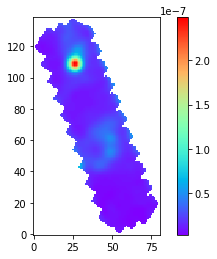

In [7]:
p.read_models(unit='adu')
p.computeValidRatios()
p.check_ratio_shapes()
psmc.read_models(unit='adu')
psmc.computeValidRatios()
psmc.check_ratio_shapes()
plt.imshow(p._measurements['OI_63'],origin='lower',cmap='rainbow')
plt.colorbar()
p.ratiocount
#p._chisq.data.shape

In [8]:
if False:
    plt.rcParams["figure.dpi"] = 100
    q=p._reducedChisq.data[:,3,110,25]
    z=np.nanmin(p._reducedChisq,(0,1))
    print(np.nanmax(z))
    #z=p._observedratios['OI_145+CII_158/FIR']
    #z=p._observedratios['OI_145/CII_158']
    #z=p._deltasq['OI_145+CII_158/FIR']
    plt.imshow(z,origin='lower')
    plt.colorbar()
    #np.nanmin(p._reducedChisq)

In [9]:
p.computeDeltaSqMap()
p.computeChisq()
psmc.computeDeltaSqMap()
psmc.computeChisq()

In [10]:
print(p._chisq.shape)
p.computeBestnG0Maps()
print(p.g0_map._data[115,25],p.n_map._data[115,25])
psmc.computeBestnG0Maps()
print(psmc.g0_map._data[115,25],psmc.n_map._data[115,25])

(29, 25, 139, 81)
G0 shape  (4768,)
N shape  (4768,)
100.0 562.3413
G0 shape  (4768,)
N shape  (4768,)
56.23413 10000.0


/n/lupus2/mpound/pdrttest/pdrtpy/pdrutils.py:429: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.g0_map.data[spatial_idx]=g0
/n/lupus2/mpound/pdrttest/pdrtpy/pdrutils.py:431: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.n_map.data[spatial_idx]=n


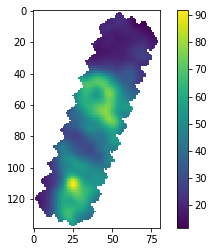

In [11]:
plt.imshow(m1.SN)
plt.colorbar()

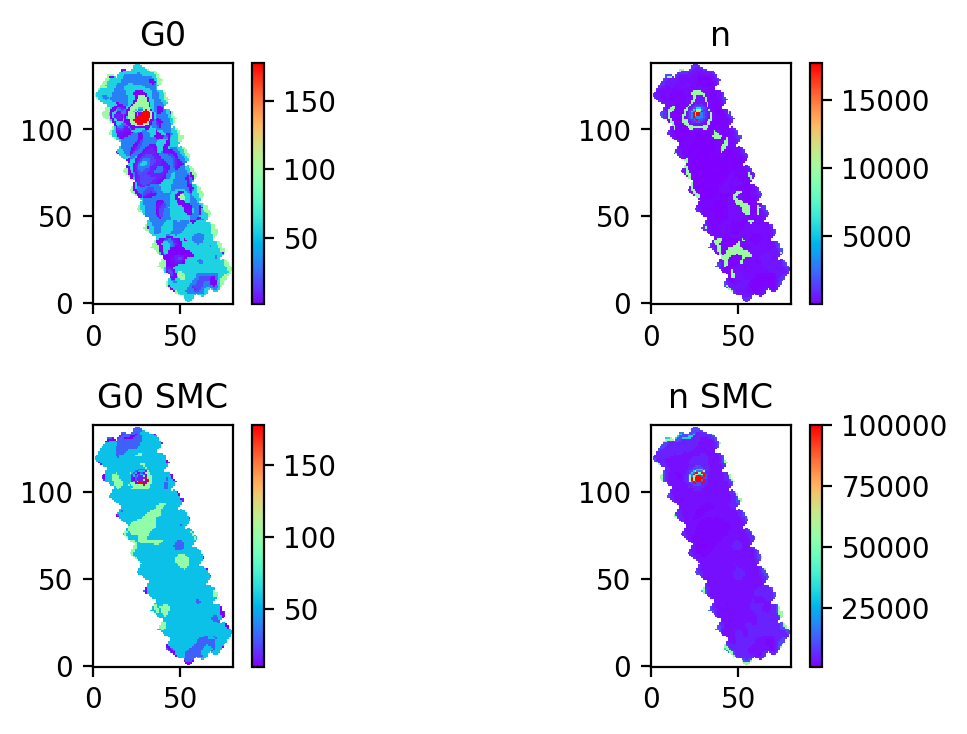

In [19]:
plt.rcParams["figure.dpi"] = 200
plt.subplot(2,2,1)
current_cmap = mcm.get_cmap('rainbow')
current_cmap.set_bad(color='white')
plt.imshow(p.g0_map,cmap=current_cmap,origin='lower')#,norm=p._zscale(p.g0_map),origin='lower')
plt.title("G0")
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(np.ma.array(p.n_map, mask=np.isnan(p.n_map)),cmap=current_cmap,origin='lower')#,norm=p._zscale(np.ma.array(p.n_map, mask=np.isnan(p.n_map))),origin='lower')
plt.title("n")
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(psmc.g0_map,cmap=current_cmap,origin='lower')
plt.title("G0 SMC")
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(np.ma.array(psmc.n_map, mask=np.isnan(psmc.n_map)),cmap=current_cmap,origin='lower')#,norm=p._zscale(np.ma.array(p.n_map, mask=np.isnan(p.n_map))),origin='lower')
plt.title("n SMC")
plt.colorbar()
plt.subplots_adjust(hspace=0.5,wspace=0.5)

In [20]:
hh=p.n_map.to_hdu()
hh.writeto('nmapsmc.fits',overwrite=True)
hh=p.g0_map.to_hdu()
hh.writeto('g0mapsmc.fits',overwrite=True)
x1=fits.open('nmapsmc.fits')

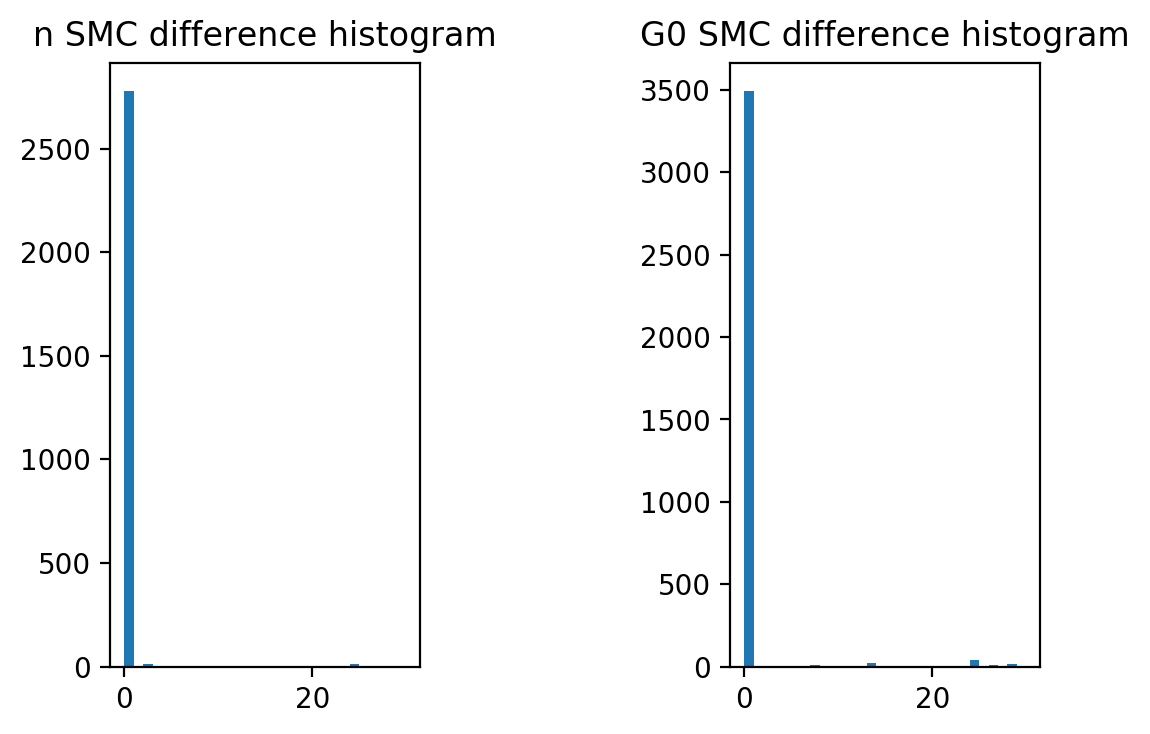

In [30]:
x1=fits.open('nmapsmc.fits')
x2=fits.open('/n/dropbox1nb/mpound/Dropbox/PDRmodels/smc_pdrmodels/n22/n22_density.fits')
#H,bins = np.histogram(x1[0].data-x2[0].data,range=[10,200])
#plt.bar(bins[:,-1],H,width=50)
#v3=x1[0].data-x2[0].data
#plt.hist(v3[~np.isnan(v3)],bins=20)
x3=Measurement.read('nmapsmc.fits',identifier="MWP",uncertainty=None)
x4=Measurement.read('/n/dropbox1nb/mpound/Dropbox/PDRmodels/smc_pdrmodels/n22/n22_density.fits',identifier="KJ",uncertainty=None)
x3._unit=u.dimensionless_unscaled
x4._unit=u.dimensionless_unscaled
v3=x3 -x4
x5=Measurement.read('g0mapsmc.fits',identifier="MWP",uncertainty=None)
x6=Measurement.read('/n/dropbox1nb/mpound/Dropbox/PDRmodels/smc_pdrmodels/n22/n22_radiation.fits',identifier="KJ",uncertainty=None)
x5._unit=u.dimensionless_unscaled
x6._unit=u.dimensionless_unscaled
v4=x5-x6
plt.subplot(1,2,1)
plt.hist(v3[~np.isnan(v3)],bins=30,range=[0,30])
plt.title("n SMC difference histogram")
plt.subplot(1,2,2)
plt.hist(v4[~np.isnan(v4)],bins=30,range=[0,30])
plt.title("G0 SMC difference histogram")
plt.subplots_adjust(wspace=1)

In [ ]:
k=p._firstkey(p._deltasq)
#np.max(p._deltasq[k])
plt.imshow(ma.masked_invalid(p._deltasq[k][21][3]))
#plt.imshow(ma.masked_invalid(p._reducedChisq[0][0]))
plt.colorbar()
#f=ma.masked_invalid(p._chisq[0][0])
#y=plt.hist(f)
p._deltasq[k].shape
len(p._deltasq)

In [ ]:
z=ma.masked_invalid(p._deltasq[k])

In [ ]:
z[0][0].shape

In [ ]:
f=fits.open(cii_flux_file)
z=ma.masked_invalid(f[0].data)
z.max()

In [ ]:
y=plt.hist(ma.compressed(z),bins=200)


In [ ]:
r='OI_145+CII_158/FIR'
newshape1 = np.hstack((p._modelratios[r].shape,p._observedratios[r].shape))
newshape2 = np.hstack((p._observedratios[r].shape,p._modelratios[r].shape))
print(newshape1,newshape2)

In [ ]:
q=fits.open(TIR_flux_file)

In [ ]:
q.info()

In [ ]:
q[0].header

In [ ]:
type(q[0].data)
#q[0].data
z=ma.masked_invalid(q[0].data)

In [ ]:
z